# Aim: Descriptive stats on the preprocessed dataset

# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [2]:
df = lib_dataimport.read_data()
words, word_frequencies = lib_processing.bag_of_words(df)

# Analysis

In [3]:
df.Author.value_counts()

Goethe      521
Schiller    442
Name: Author, dtype: int64

In [4]:
df["length"] = [len(l) for l in df.Content]
df.groupby("Author").mean().length

Author
Goethe      1544.988484
Schiller    2026.092760
Name: length, dtype: float64

<AxesSubplot:xlabel='Author', ylabel='length'>

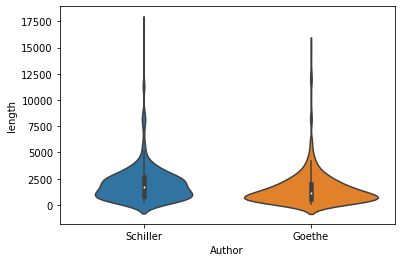

In [17]:
sns.violinplot(x=df.Author, y=df.length)

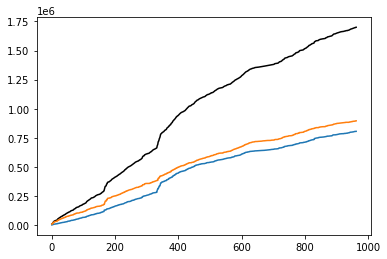

In [18]:
df["cum_words"] = np.cumsum(df.length)
df["cum_words_G"] = np.cumsum([length if author == "Goethe" else 0 for (length, author) in zip(df.length, df.Author)])
df["cum_words_S"] = np.cumsum([length if author == "Schiller" else 0 for (length, author) in zip(df.length, df.Author)])
plt.plot(df.cum_words, c="black")
plt.plot(df.cum_words_G)
plt.plot(df.cum_words_S)

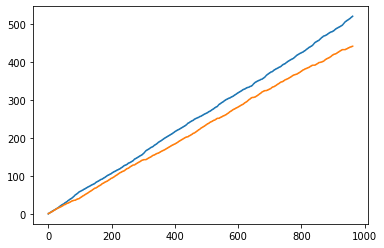

In [7]:
df["cum_counts_G"] = np.cumsum([1 if author == "Goethe" else 0 for author in df.Author])
df["cum_counts_S"] = np.cumsum([1 if author == "Schiller" else 0 for author in df.Author])
plt.plot(df.cum_counts_G)
plt.plot(df.cum_counts_S)

In [19]:
df

,Nb,Author,Content,length,cum_words,cum_words_G,cum_words_S,cum_counts_G,cum_counts_S
0,1,Schiller,"Hochwohlgeborner Herr, ...",7623,7623,0,7623,0,1
1,2,Goethe,Ew. Wohlgeboren eröffnen mir eine doppelt ange...,1003,8626,1003,7623,1,1
2,3,Goethe,Sie erhalten hierbei die Schocherische Abhandl...,628,9254,1631,7623,2,1
3,4,Schiller,Jena den 23. August 1794. Man brachte mir gest...,7751,17005,1631,15374,2,2
4,5,Goethe,"Zu meinem Geburtstage, der mir diese Woche ers...",2782,19787,4413,15374,3,2
...,...,...,...,...,...,...,...,...,...
958,995,Schiller,Die Anmerkungen lesen sich vortrefflich und au...,1180,1697114,803729,893385,518,441
959,996,Goethe,"[Weimar, 24. April 1805.] Wollten Sie wohl die...",184,1697298,803913,893385,519,441
960,997,Goethe,"[Weimar, 25. April 1805.] Hier endlich der Res...",704,1698002,804617,893385,520,441
961,998,Schiller,"[Weimar, 25. April 1805.] Die Anmerkungen schl...",2148,1700150,804617,895533,520,442
